# Housing Project Presentation (CZ)
<img src="https://i.imgur.com/GSgP1L5.jpg" width="1000" align="center"/>


## Presentation points that we need to consider:
 - Introduction
 - Projects presentation
   - Project 1
   - Project 2
   - Project 3
 - Market Analysis
   - Dedicate a significant portion of your presentation to showcasing the strong demand for vacation rentals in the Czech Republic. Highlight occupancy rates, pricing trends, and the overall growth potential of the market.
   - Market trends in comparison to other European countries
   - Economic growth and tourism growth
 - Overview of Vacation Rental Market
   - Market Size
   - Market Segmentation
   - Market Growth
 - Competition Analysis
   - Pricing Analysis
   - Occupancy rates
   - Competitive Landscape
   - Our Competitive Advantage
 - Market Trends and Housing Completion
   - Market Trends
   - Investment Opportunity
 - Financial Projections
   - Financial Viability
   - Cash flow predictions
     - Investment Returns
     - Predicted Occupancy Rates
     - Predicted Average Daily Rates
 - Location Insights
   - Potential Locations
 - Regulatory Compliance
 - Taxation
   - Taxation of Rental Income
   - Airbnb Taxation
 - Marketing Strategy

# Notes
- airbnb data
  -  occupancy per 
- land prices
- price of the construction

100k for the investment 

10k for land
60k for the house
 - 20k goal for the house

- maintenance costs 
- burn rate

200 euros is the per day 

## Market trends

In [3]:
file_path = "data\Housing construction dwellings started 1998 - 2023.xlsx"

In [4]:
# Import required libraries
import pandas as pd
import plotly.express as px

def load_and_clean_data(file_path):
    """Load and clean the dataset."""
    # Load the data
    df = pd.read_excel(file_path)
    # ... [The rest of your cleaning code]
    return df_clean  # Assuming df_clean is defined somewhere in your cleaning code

def plot_total_houses_trend(df, peak_year, peak_value, lowest_year, lowest_value, last_year, last_value):
    """Plot the trend in the total number of houses started over the years using Plotly for interactivity."""
    
    # Create the interactive plot
    fig = px.line(df, x='Year', y='Total_Dwellings',
                  title='<b>Trend in the Total Number of Houses Started (1998 - 2023)</b>',
                  labels={'Total_Dwellings': 'Total Number of Houses Started'},
                  template='plotly_white')
    
    # Customize the plot
    fig.update_layout(
        font=dict(
            family="Arial, monospace",
            size=25,  # Увеличение размера шрифта для основного текста
        ),
        title_font=dict(size=42, family="Open Sans, sans-serif"),  # Увеличение размера шрифта для заголовка
        xaxis_title_font=dict(size=28), # Увеличение размера шрифта для названия оси X
        xaxis_tickfont=dict(size=25),  # Увеличение размера шрифта для делений оси X
        yaxis_title_font=dict(size=28), # Увеличение размера шрифта для названия оси Y
        yaxis_tickfont=dict(size=25),  # Увеличение размера шрифта для делений оси Y
        height=800,  # Задание высоты графика
        annotations=[
            dict(x=lowest_year, y=lowest_value, xref="x", yref="y",
                 text=f"<b>Lowest: {lowest_year}, {lowest_value:,}</b>", showarrow=True, arrowhead=7, ax=0, ay=40, font=dict(size=25)),  # Увеличение размера шрифта для аннотаций
            dict(x=last_year, y=last_value, xref="x", yref="y",
                 text=f"<b>Latest: {last_year}, {last_value:,}</b>", showarrow=True, arrowhead=7, ax=0, ay=-40, font=dict(size=25))  # Увеличение размера шрифта для аннотаций
        ]
    )
    
    fig.update_yaxes(range=[0, df['Total_Dwellings'].max() + 500])  # Start y-axis from 0
    
    # Show the plot
    fig.show()

# Assuming df_clean is your cleaned DataFrame
df_clean = load_and_clean_data(file_path)

# Identify the peak, the lowest, and the last point for "Total_Dwellings"
peak_point_total = df_clean[df_clean['Total_Dwellings'] == df_clean['Total_Dwellings'].max()]
lowest_point_total = df_clean[df_clean['Total_Dwellings'] == df_clean['Total_Dwellings'].min()]
last_point_total = df_clean[df_clean['Year'] == df_clean['Year'].max()]

# Extract the year and total number of houses started for these points
peak_year_total, peak_value_total = int(peak_point_total['Year'].iloc[0]), int(peak_point_total['Total_Dwellings'].iloc[0])
lowest_year_total, lowest_value_total = int(lowest_point_total['Year'].iloc[0]), int(lowest_point_total['Total_Dwellings'].iloc[0])
last_year_total, last_value_total = int(last_point_total['Year'].iloc[0]), int(last_point_total['Total_Dwellings'].iloc[0])

# Plot the trend in the total number of houses started over the years
plot_total_houses_trend(df_clean, peak_year_total, peak_value_total, lowest_year_total, lowest_value_total, last_year_total, last_value_total)


In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean_data(file_path):
    """
    Load and clean the dataset.
    
    Parameters:
        file_path (str): The path to the Excel file.
        
    Returns:
        pd.DataFrame: The cleaned DataFrame.
    """
    # Load the data from Excel file
    df = pd.read_excel(file_path)
    
    # Remove unnecessary header rows and reset index
    df_clean = df.iloc[3:].reset_index(drop=True)
    
    # Set appropriate column names
    column_names = [
        "Year", "Total_Dwellings", "Total_Index", "Family_Houses",
        "Family_Houses_Index", "Multi_Dwelling_Buildings",
        "Multi_Dwelling_Buildings_Index", "Change_Existing_Family_Houses",
        "Change_Existing_Family_Houses_Index", "Change_Existing_Multi_Dwelling_Buildings",
        "Change_Existing_Multi_Dwelling_Buildings_Index", "Non_Residential_Buildings",
        "Non_Residential_Buildings_Index"
    ]
    df_clean.columns = column_names
    
    # Drop rows where 'Year' is NaN
    df_clean = df_clean.dropna(subset=['Year'])
    
    # Filter rows containing only 4-digit years and convert them to numeric type
    df_clean = df_clean[df_clean['Year'].astype(str).str.isnumeric()]
    df_clean['Year'] = pd.to_numeric(df_clean['Year'])
    
    return df_clean

def plot_family_houses_trend(df):
    """
    Plot the trend in the number of family houses started over the years.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the cleaned data.
    """
    # Set plot aesthetics
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 4))
    
    # Create the plot
    sns.lineplot(x='Year', y='Family_Houses', data=df, marker='o')
    
    # Customize the plot
    plt.title('Trend in the Number of Family Houses Started (1998 - 2023)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Family Houses Started', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Show the plot
    plt.show()

# Main code
if __name__ == "__main__":
    # Path to the Excel file
    file_path = 'data/Housing construction dwellings started 1998 - 2023.xlsx'  # Replace with your file path
    
    # Load and clean the data
    df_clean = load_and_clean_data(file_path)

In [10]:
# Import required libraries
import pandas as pd
import plotly.express as px

def load_and_clean_data(file_path):
    """Load and clean the dataset."""
    # Load the data
    df = pd.read_excel(file_path)
    # ... [The rest of your cleaning code]
    return df_clean  # Assuming df_clean is defined somewhere in your cleaning code

def plot_total_houses_trend(df, peak_year, peak_value, lowest_year, lowest_value, last_year, last_value):
    """Plot the trend in the total number of houses started over the years using Plotly for interactivity."""
    
    # Create the interactive plot
    fig = px.line(df, x='Year', y='Total_Dwellings',
                  title='<b>Trend in the Total Number of Houses Started (1998 - 2023)</b>',
                  labels={'Total_Dwellings': 'Total Number of Houses Started'},
                  template='plotly_white')
    
    # Customize the plot
    fig.update_layout(
        font=dict(
            family="Arial, monospace",
            size=14,
        ),
        title_font=dict(size=24, family="Arial, bold"),
        annotations=[
            dict(x=lowest_year, y=lowest_value, xref="x", yref="y",
                 text=f"<b>Lowest: {lowest_year}, {lowest_value:,}</b>", showarrow=True, arrowhead=7, ax=0, ay=40),
            dict(x=last_year, y=last_value, xref="x", yref="y",
                 text=f"<b>Latest: {last_year}, {last_value:,}</b>", showarrow=True, arrowhead=7, ax=0, ay=-40)
        ]
    )
    
    fig.update_yaxes(range=[0, df['Total_Dwellings'].max() + 500])  # Start y-axis from 0
    
    # Show the plot
    fig.show()

# Assuming df_clean is your cleaned DataFrame
df_clean = load_and_clean_data(file_path)

# Identify the peak, the lowest, and the last point for "Total_Dwellings"
peak_point_total = df_clean[df_clean['Total_Dwellings'] == df_clean['Total_Dwellings'].max()]
lowest_point_total = df_clean[df_clean['Total_Dwellings'] == df_clean['Total_Dwellings'].min()]
last_point_total = df_clean[df_clean['Year'] == df_clean['Year'].max()]

# Extract the year and total number of houses started for these points
peak_year_total, peak_value_total = int(peak_point_total['Year'].iloc[0]), int(peak_point_total['Total_Dwellings'].iloc[0])
lowest_year_total, lowest_value_total = int(lowest_point_total['Year'].iloc[0]), int(lowest_point_total['Total_Dwellings'].iloc[0])
last_year_total, last_value_total = int(last_point_total['Year'].iloc[0]), int(last_point_total['Total_Dwellings'].iloc[0])

# Plot the trend in the total number of houses started over the years
plot_total_houses_trend(df_clean, peak_year_total, peak_value_total, lowest_year_total, lowest_value_total, last_year_total, last_value_total)


In [5]:
# Import required libraries
import pandas as pd
import plotly.graph_objects as go

def load_and_clean_data(file_path):
    """Load and clean the dataset."""
    # Load the data
    df = pd.read_excel(file_path)
    # ... [The rest of your cleaning code]
    return df_clean

# Updating the function to plot the trend for selected categories with specific customization
def plot_selected_trends_improved(df):
    """Plot the trend in selected categories following principles from 'Storytelling With Data'."""
    
    # Create a subplot with shared x-axis
    fig = go.Figure()

    # Add traces for the selected categories with balanced colors
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Total_Dwellings'], mode='lines', name='Total',
                             line=dict(color='lightgrey', width=2)))
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Family_Houses'], mode='lines', name='In Family Houses',
                             line=dict(color='green', width=3)))
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Multi_Dwelling_Buildings'], mode='lines', name='In Multi-Dwelling Buildings',
                             line=dict(color='red', width=3)))
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Non_Residential_Buildings'], mode='lines', name='In Non-Residential Buildings',
                             line=dict(color='purple', width=3)))
    
    # Customize the layout, following the principles from "Storytelling With Data"
    fig.update_layout(
        plot_bgcolor='white',  # White background color
        title='<b>Housing construction, dwellings started: (1998 - 2023)</b>',
        xaxis_title='Year',
        yaxis_title='Number of Dwellings',
        font=dict(
            family="Arial, monospace",
            size=14
        ),
        title_font=dict(
            size=24,
            family="Arial, bold"
        ),
        annotations=[
            dict(x=0.5, y=-0.4, xref="paper", yref="paper",
                 text="Source: Czech Republic Housing Data (1998 - 2023)", showarrow=False)
        ]
    )
    
    fig.update_yaxes(range=[0, df[['Total_Dwellings', 'Family_Houses', 'Multi_Dwelling_Buildings', 'Non_Residential_Buildings']].max().max() + 500])  # Start y-axis from 0
    
    # Show the plot
    fig.show()

# Assume df_clean is loaded and cleaned data (replace with actual cleaning steps)
# df_clean = load_and_clean_data(file_path)

# Filter the dataset to keep only the selected categories
selected_columns = ['Year', 'Total_Dwellings', 'Family_Houses', 'Multi_Dwelling_Buildings', 'Non_Residential_Buildings']
df_selected = df_clean[selected_columns]

# Plot the trends in the selected categories with improved styling
plot_selected_trends_improved(df_selected)


The data suggests that the construction industry in the Czech Republic has been on an upward trajectory in the past decade, with multi-dwelling buildings playing an increasingly important role. This growth can be attributed to factors like urbanization, economic stability, and changing housing preferences. However, the construction industry is still subject to cyclical patterns and external economic factors that can impact its performance.

In [17]:
# Extracted data points from the document
average_price_per_sqm = 3342  # EUR/sqm (Page 9)
annual_price_growth = 0.1842  # % (Page 9)
affordability_index = 13.31  # Number of gross annual salaries needed to purchase a new dwelling (Page 15)
rental_market_trend = "Prices in the rental segment will grow in the next few months."  # (Page 20)

# Calculating potential ROI (Return on Investment) based on average price and annual growth
initial_investment = average_price_per_sqm * 70  # Assuming 70 sqm house cabin
potential_roi = initial_investment * (annual_price_growth / 100)

# Displaying key insights
print(f"Average Price per sqm: {average_price_per_sqm} EUR")
print(f"Annual Price Growth: {annual_price_growth}%")
print(f"Affordability Index: {affordability_index}")
print(f"Rental Market Trend: {rental_market_trend}")
print(f"Potential ROI in one year: {potential_roi} EUR")


Average Price per sqm: 3342 EUR
Annual Price Growth: 0.1842%
Affordability Index: 13.31
Rental Market Trend: Prices in the rental segment will grow in the next few months.
Potential ROI in one year: 430.91748 EUR


## Comparison to other European countries

<img src="https://i.imgur.com/5gFxFfc.png" width="1000" align="center"/>

### Bullet Points for Investment in Czech Republic

- **Strong Annual Growth**: The Czech Republic has an annual growth rate of 12.1% in housing prices, which is higher than the European average. This indicates a strong and growing market.
    
- **Competitive Pricing**: With an average transaction price of 3,753 EUR/sqm, the Czech Republic offers competitive pricing compared to other European countries like Germany (4,800 EUR/sqm) and Austria (4,925 EUR/sqm).
    
- **Resilience to Market Fluctuations**: Unlike countries like the United Kingdom and Denmark, which have seen drops in average transaction prices, the Czech Republic has shown consistent growth.
    
- **Affordable Compared to Top Markets**: While not the cheapest, the Czech Republic offers a more affordable entry point than the top 5 most expensive countries in Europe, providing a balanced investment opportunity.
    
- **High Attractiveness Score**: Based on our calculations, the Czech Republic has a high attractiveness score, making it one of the best choices for real estate investment in the EU.

*data from 2022*

## Remember This

"Invest in the Czech Republic: Strong Growth, Competitive Pricing."

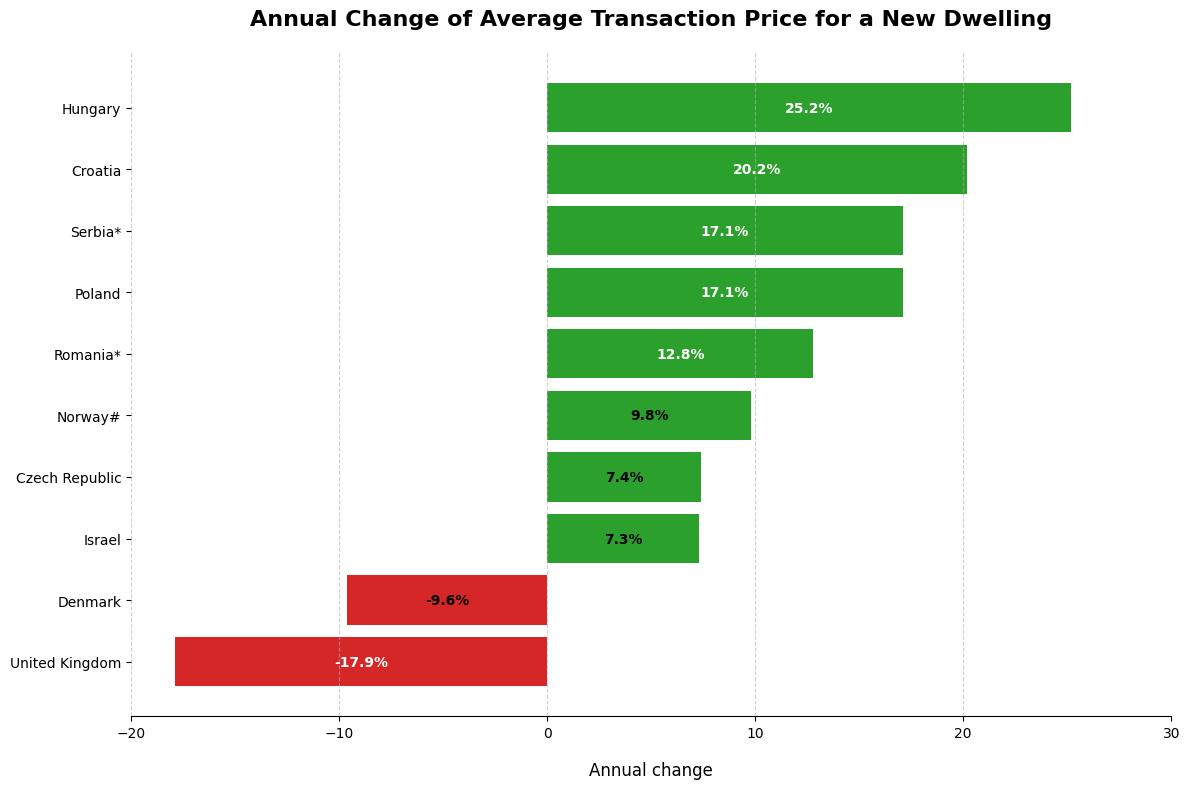

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data
# Czech republic shoud be in bold
countries = ["United Kingdom", "Denmark", "Israel", "Czech Republic", "Norway#", "Romania*", "Poland", "Serbia*", "Croatia", "Hungary"]
percent_changes = [-17.9, -9.6, 7.3, 7.4, 9.8, 12.8, 17.1, 17.1, 20.2, 25.2]

# Sort data for the plot
sorted_indices = np.argsort(percent_changes)
sorted_countries = [countries[i] for i in sorted_indices]
sorted_changes = [percent_changes[i] for i in sorted_indices]

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(sorted_countries, sorted_changes, color=['#d62728' if x < 0 else '#2ca02c' for x in sorted_changes])

# Annotate each bar with the percentage
for bar in bars:
    width = bar.get_width()
    label_text = f"{width:.1f}%"
    label_color = 'white' if abs(width) > 10 else 'black'  # Adjust label color based on bar length for readability
    ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2, label_text,
            va='center', ha='center', color=label_color, weight='bold', fontsize=10)

# Title and labels
ax.set_title("Annual Change of Average Transaction Price for a New Dwelling", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Annual change", fontsize=12, labelpad=15)
ax.set_xlim([-20, 30])  # Define x-axis limit

# Reduce clutter
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


### Presentation Bullet Points:

**Annual Change of Average Transaction Price for a New Dwelling**

- The **Czech Republic** saw an increase of **7.4%**.
- This is relatively modest when compared to countries like **Bosna and Hercegovina** at **27.0%** or **Hungary** at **25.2%**.
- However, it's a positive growth, unlike countries such as the **United Kingdom**, which experienced a **\-17.9%** decrease.
- Out of the 11 countries listed, 9 experienced positive growth while 2 experienced a decline.
- The Czech Republic's growth is consistent with the overall upward trend seen in the majority of countries.

## Rental market

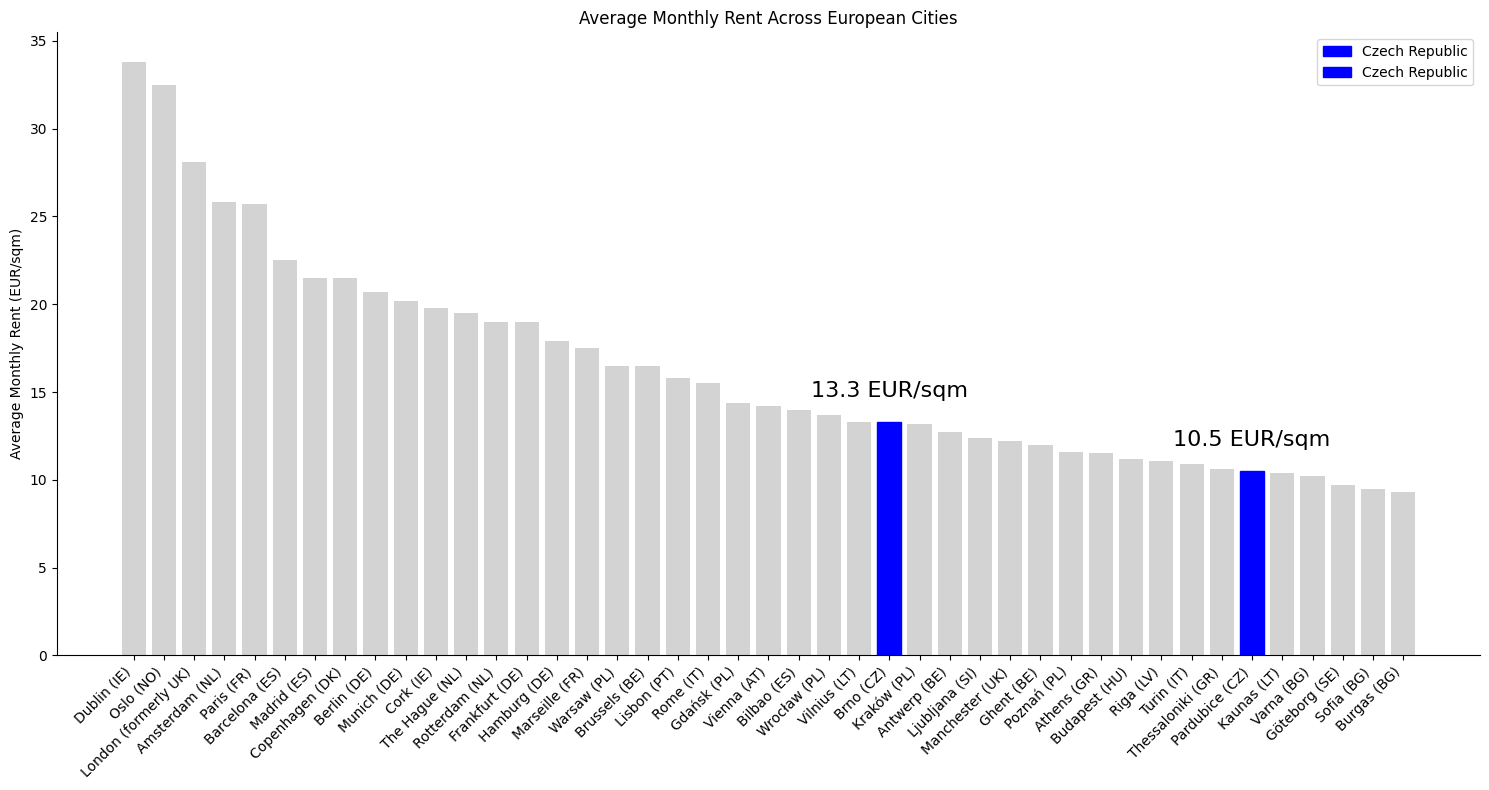

In [31]:
import matplotlib.pyplot as plt

# List of cities in order
cities = [
    "Dublin (IE)", "Oslo (NO)", "London (formerly UK)", "Amsterdam (NL)", "Paris (FR)", 
    "Barcelona (ES)", "Madrid (ES)", "Copenhagen (DK)", "Berlin (DE)", "Munich (DE)",
    "Cork (IE)", "The Hague (NL)", "Rotterdam (NL)", "Frankfurt (DE)", "Hamburg (DE)",
    "Marseille (FR)", "Warsaw (PL)", "Brussels (BE)", "Lisbon (PT)", "Rome (IT)",
    "Gdańsk (PL)", "Vienna (AT)", "Bilbao (ES)", "Wrocław (PL)", "Vilnius (LT)",
    "Brno (CZ)", "Kraków (PL)", "Antwerp (BE)", "Ljubljana (SI)", "Manchester (UK)",
    "Ghent (BE)", "Poznań (PL)", "Athens (GR)", "Budapest (HU)", "Riga (LV)",
    "Turin (IT)", "Thessaloniki (GR)", "Pardubice (CZ)", "Kaunas (LT)", "Varna (BG)",
    "Göteborg (SE)", "Sofia (BG)", "Burgas (BG)"
    # ... extend this list with all cities
]

# Corresponding rent values
rents = [
    33.8, 32.5, 28.1, 25.8, 25.7, 
    22.5, 21.5, 21.5, 20.7, 20.2, 
    19.8, 19.5, 19.0, 19.0, 17.9, 
    17.5, 16.5, 16.5, 15.8, 15.5, 
    14.4, 14.2, 14.0, 13.7, 13.3, 
    13.3, 13.2, 12.7, 12.4, 12.2, 
    12.0, 11.6, 11.5, 11.2, 11.1, 
    10.9, 10.6, 10.5, 10.4, 10.2, 
    9.7, 9.5, 9.3 
    # ... extend this list with all rent values
]


import matplotlib.pyplot as plt

# List of cities and their corresponding rents
# ... [keeping the given lists as is]

# Creating the bar chart
fig, ax = plt.subplots(figsize=(15, 8))

bars = ax.bar(cities, rents, color='lightgray')  # Default color

# Highlight and annotate Czech Republic cities
for city, bar, rent in zip(cities, bars, rents):
    if "CZ" in city:
        bar.set_color('blue')
        bar.set_label('Czech Republic')
        height = bar.get_height()
        ax.annotate('{:.1f} EUR/sqm'.format(rent),  # Formatting to 1 decimal place
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 15),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=16, color='black')

# Simplifying the graph
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Monthly Rent (EUR/sqm)')
plt.title('Average Monthly Rent Across European Cities')

# Displaying the chart
plt.tight_layout()
plt.show()


## Economic Context

1. **Eurozone Economic Recovery**: The Eurozone has shown resilience in overcoming the 2012-2013 Sovereign Debt Crisis and the economic impacts of the Covid-19 pandemic. It has returned to pre-pandemic levels as of 2022.
2. **Current Economic Outlook**: Economic stagnation was avoided in Q4 2022 thanks to government relief measures and lower energy prices. IMF forecasts a growth of 0.8% for 2023.
3. **Monetary Policy**: Central banks are under pressure to tackle inflation, with the ECB and the Fed raising interest rates.

### Implications for Real Estate

1. **Inflation and Interest Rates**: The current high inflation rate and tightening of monetary policy could lead to higher mortgage rates, affecting demand in the property market.
2. **GDP and Housing Market**: There is a high positive correlation between GDP growth and house prices. GDP growth could be supportive for real estate prices.
3. **Risk Factors**: The main risks include failure to contain financial stability and higher inflation than expected, which could lead to even tighter monetary conditions.

### Specifics to Czech Republic (Housing market and Interest rates)

1. **Housing Market Sensitivity**: The housing market is generally sensitive to changes in economic conditions like GDP growth and interest rates.
2. **Real Estate Prices**: Given the GDP outlook, there could be support for real estate prices, but this is balanced by the tightening monetary conditions.

In [39]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Convert data to dataframe
data = {
    "Characteristic": ["Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", 
                      # ... (include all countries)
                      "United Kingdom"],
    "2022": [3.7, 8.7, 5, -4.7, 3.1, 3.8, # ... (include data for all countries for 2022)
             4],
    "2023": [2.2, 1.3, 0.4, 0.7, 0.7, 2, # ... (include data for all countries for 2023)
             -0.3],
    # ... (continue with other years in similar fashion)
}
df = pd.DataFrame(data)

# Melt the dataframe to get year as a separate column
df_melted = df.melt(id_vars="Characteristic", 
                    value_vars=df.columns[1:], 
                    var_name="Year", 
                    value_name="Percentage Growth")

# Visualize the data with plotly express
fig = px.line(df_melted, 
              x='Year', 
              y='Percentage Growth', 
              color='Characteristic', 
              title="Country Wise Percentage Growth Over Years")

# Highlight Czech Republic
fig.update_traces(line=dict(width=2), selector=dict(name="Czech Republic"))

# Apply principles from "Storytelling With Data" by focusing on Czech Republic
# - We have already highlighted the Czech Republic line.
# - The axis labels, title, and the grid are provided by plotly by default and are clear and intuitive.
# - The graph is kept simple without too much clutter.

# Add the source of the prediction
fig.add_annotation(text="Source: statista.com",
                  xref="paper", yref="paper",
                  x=0.95, y=-0.2, showarrow=False)

fig.show()
